# Time Series: Forecast month-wise sales quantity
- Apply all the diff forecasting techniqes we have - 
- 1.Moving avg(MA) : Uses fixed period lag or windows
- 2.exponential smoothing
- 3.autoregressor (AR)
- 4.Combine AR+MA = ARMA
- 5.ARIMA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
#interested only in forecating of the sale quantity here:
df1 = pd.read_csv(r'C:\users\91842\Downloads\wsb.csv')
df1.head()

,Month,Sale Quantity,Promotion Expenses,Competition Promotion
0,1,3002666,105,1
1,2,4401553,145,0
2,3,3205279,118,1
3,4,4245349,130,0
4,5,3001940,98,1


C:\Users\91842\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


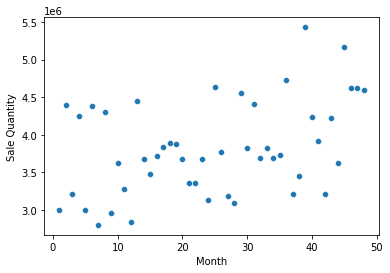

In [4]:
sns.scatterplot(df1['Month'], df1['Sale Quantity']);

So random, no pattern, no trend

### Forecast using Moving Average:

- At first we are considering lag or window as 12 here
- Using this high lag let's see how the forecast data looks like

In [15]:
df1['Sale Quantity'].shape

(48,)

In [19]:
df1['Moving_12'] = df1['Sale Quantity'].rolling(window=12).mean().shift(1)  #shift1 means the next value

In [20]:
df1[['Sale Quantity','Moving_12']]

,Sale Quantity,Moving_12
0,3002666,NaN
1,4401553,NaN
2,3205279,NaN
3,4245349,NaN
4,3001940,NaN
5,4377766,NaN
6,2798343,NaN
7,4303668,NaN
8,2958185,NaN
9,3623386,NaN


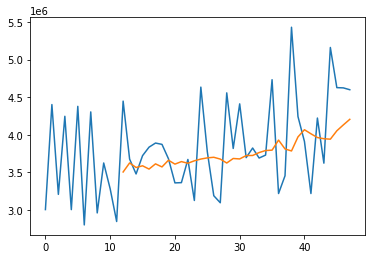

In [22]:
# Now plot actual vs forecatsted values: For all the 48 months we have the actual slaes quantity numbers
plt.plot(df1['Sale Quantity'])
plt.plot(df1['Moving_12']);

- The blue line is for the actual data points. 
- The orange is for the forecasted data points.
- So it seems the forecasted values are not even closer 
- And the forcasted values are not even able to capture those fluctuations in the data
- Now change the window to 2 and then again plot:

- As the higher no of lags/window does not look good for this data, now let's check with lag=2

In [23]:
df1['Moving_2'] = df1['Sale Quantity'].rolling(window=2).mean().shift(1)  #shift1 means the next value

In [24]:
df1['Moving_2']

0           NaN
1           NaN
2     3702109.5
3     3803416.0
4     3725314.0
5     3623644.5
6     3689853.0
7     3588054.5
8     3551005.5
9     3630926.5
10    3290785.5
11    3451250.5
12    3061440.5
13    3645673.5
14    4061443.0
15    3576230.5
16    3598975.0
17    3777440.0
18    3861499.5
19    3880127.5
20    3775602.0
21    3519052.0
22    3359865.0
23    3515925.0
24    3397164.0
25    3879006.5
26    4203463.0
27    3479994.5
28    3140396.5
29    3825523.0
30    4187159.5
31    4113921.5
32    4052800.0
33    3758691.0
34    3755977.5
35    3708970.0
36    4230665.5
37    3974580.0
38    3334861.0
39    4442445.0
40    4836751.0
41    4075869.0
42    3563162.5
43    3719221.5
44    3921519.5
45    4391617.5
46    4894689.0
47    4625561.0
Name: Moving_2, dtype: float64

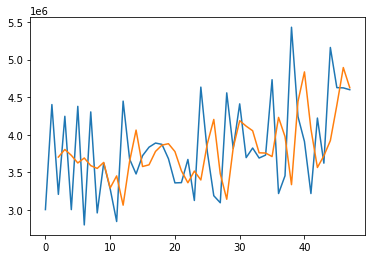

In [25]:
#plot actual vs forecatsted values:
plt.plot(df1['Sale Quantity'])
plt.plot(df1['Moving_2'])

- So, the forecasting is smoother now and the forcasted data is also able to capture the fluctuations in the original data.

### Forecast using Exponential Moving Avg:
- Take the alpha (smoothing factor or penalty value) as 0.1 or 0.2

In [11]:
#Expo smoothing:
#take alpha value 0.1 or 0.2, not beyond 0.4
df1['expo_sm_Sale Quantity'] = df1['Sale Quantity'].ewm(alpha=0.2).mean()

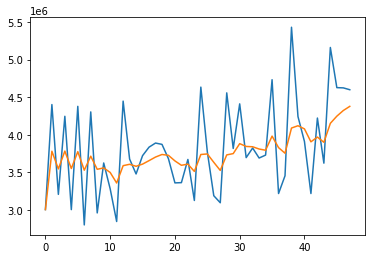

In [12]:
#plot actual vs forecatsted values:
plt.plot(df1['Sale Quantity'])
plt.plot(df1['expo_sm_Sale Quantity'])

- So, using expo method the forecasting is smoother(using a single lag) that the Moving avg forecast.
- It is able to capture the fluctutaions of the original data points

### Forecast Using ARMA Model:
- vimana dataset

In [27]:
#ARMA:
df2 = pd.read_csv(r'C:\users\91842\Downloads\vimana.csv')
df2.head()

,Month,demand
0,1,457
1,2,439
2,3,404
3,4,392
4,5,403


##### ARMA Model: Need only p,q parameters here
- The two parameters we need here are p and q. Check what should be the optimal lag from ACF, PACF plots
- from acf we will get q lags 
- from pacf we will get p lags

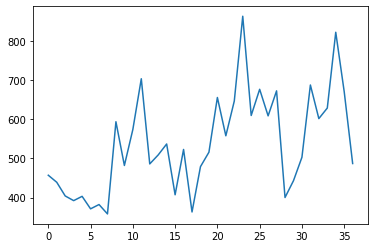

In [14]:
plt.plot(df2['demand'])

In [28]:
#plot ACF:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

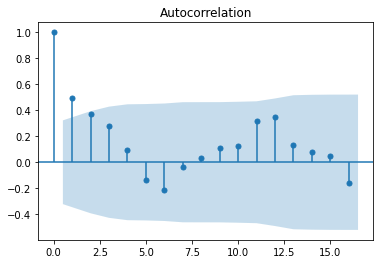

In [16]:
acf_plot = plot_acf(df2['demand'])

- So, we can see that 2 piont are shoot up beyond the boundaries, hence we will take 2 lags
- acf is wrt the previous ones

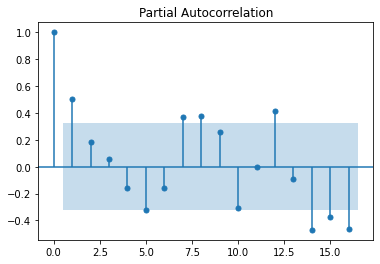

In [17]:
acf_plot = plot_pacf(df2['demand'])

So, further away points are correlated (many shoot ups = 8) but not with the previous ones
- look for the pacf model for ARMA model
- pacf - refers to AR model
- acf - refers to MA model
- Here too much of correlation here - so need to apply differencing to nullify the effect of correlation
- if difference is high - means higher spikes, if difference is low - means constant

# Practice: MA Calculation

In [18]:
t1 = pd.DataFrame({'Data':[1,2,3,4,5,6],'y':[50,40,35,55,45,42]})
t1

,Data,y
0,1,50
1,2,40
2,3,35
3,4,55
4,5,45
5,6,42


Window:
- Window = 1, means for the current data point just take the previous observed data point.
- So in this case for the 1st value there is no previous value and hence it will be NA

In [19]:
t1['Moving_1'] = t1['y'].rolling(window=1).mean().shift(1)  #shift1 means the next value
t1

,Data,y,Moving_1
0,1,50,NaN
1,2,40,50.0
2,3,35,40.0
3,4,55,35.0
4,5,45,55.0
5,6,42,45.0


In [20]:
t1['Moving_2'] = t1['y'].rolling(window=2).mean().shift(1)  #shift1 means the next value
t1

,Data,y,Moving_1,Moving_2
0,1,50,NaN,NaN
1,2,40,50.0,NaN
2,3,35,40.0,45.0
3,4,55,35.0,37.5
4,5,45,55.0,45.0
5,6,42,45.0,50.0


In [21]:
t1['Moving_3'] = t1['y'].rolling(window=3).mean().shift(1)  #shift1 means the next value
t1

,Data,y,Moving_1,Moving_2,Moving_3
0,1,50,NaN,NaN,NaN
1,2,40,50.0,NaN,NaN
2,3,35,40.0,45.0,NaN
3,4,55,35.0,37.5,41.666667
4,5,45,55.0,45.0,43.333333
5,6,42,45.0,50.0,45.000000


EMA:

In [22]:
t2 = pd.DataFrame({'Data':[1,2,3,4,5],'y':[40,45,50,35,42]})
t2

,Data,y
0,1,40
1,2,45
2,3,50
3,4,35
4,5,42


In [24]:
#Expo smoothing:
#take alpha value 0.1 or 0.2, not beyond 0.4
t2['expo_ma_y'] = t1['y'].ewm(alpha=0.2).mean()
t2

,Data,y,expo_ma_y
0,1,40,50.000000
1,2,45,44.444444
2,3,50,40.573770
3,4,35,45.460705
4,5,42,45.323655


In [25]:
#Expo smoothing:
#take alpha value 0.1 or 0.2, not beyond 0.4
t2['expo_ma_y2'] = t1['y'].ewm(alpha=0.2, adjust=False).mean()
t2

,Data,y,expo_ma_y,expo_ma_y2
0,1,40,50.000000,50.000
1,2,45,44.444444,48.000
2,3,50,40.573770,45.400
3,4,35,45.460705,47.320
4,5,42,45.323655,46.856
